# Prosper Loan – Borrower APR
## by Mohamed Sabry

## Investigation Overview

> Checking the prosper loan and try to find what variables maybe be affecting borrower APR.


## Dataset Overview

>Dataset is for prosper loan data contains of almost 114K record across 81 features. below you will find links for dataset itself as well as a detailed description dictionary

[Link for the data set](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv)

[Link for a detailed description dictionary](http://www.transtats.bts.gov/Fields.asp?Table_ID=236)


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#loading the data set into a dataframe and getting to know about it more

df = pd.read_csv('prosperLoanData.csv')
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#relation between ProsperRating (higher means better score and less risk. Less means higher risk.
#changing the data type to be categorical as that will be easier for sorting specially that most propaply we will see this
#variable again.
ProsperRatingOrder = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ProsperRatingClass = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRatingOrder)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ProsperRatingClass);


#trying to make a logical order for Employment Status and setting the variable as categorical
EmploymentStatusOrder = ['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time', 'Retired', 'Not available', 'Not employed']
EmploymentStatusClass = pd.api.types.CategoricalDtype(ordered=True, categories=EmploymentStatusOrder)
df['EmploymentStatus'] = df['EmploymentStatus'].astype(EmploymentStatusClass);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower APR Vs Borrower Rate

> As the borrower APR equals the borrower rate plus any fees we can see that both distribution are almost identical with the APR being slightly higher. Distribution of the APR is multimodal with several peaks around 0.1, 0.2, 0.3 and 0.36. The last one is the highest peak. Few loans have APR higher than 0.4.

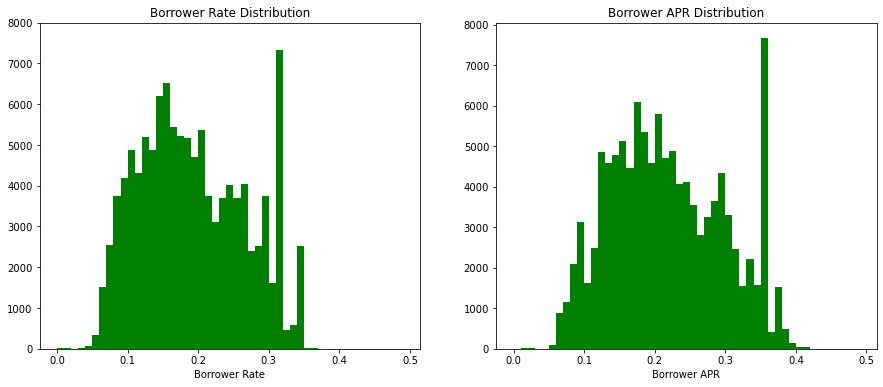

In [4]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1) 
bins = np.arange(0, .5, 0.01)
plt.hist(data = df , x = 'BorrowerRate', bins=bins, color = "green");
plt.title('Borrower Rate Distribution');
plt.xlabel('Borrower Rate');
plt.ylim(0, 8000);


plt.subplot(1, 2, 2)
bins = np.arange(0, .5, 0.01)
plt.hist(data = df , x = 'BorrowerAPR', bins=bins, color = "green");
plt.title('Borrower APR Distribution');
plt.xlabel('Borrower APR');


## Relation between Borrower APR VS.  Debt to Income Ratio

> A correlation is shown here between the borrower APR and the debt to loan ration. The less debt to loan ratio the less APR, and the higher debt to loan ration means higher APR. This might be due to the fact that the less debt to loan ratio means that you have more ability to pay your installments which means less risk on the lender. And vis versa.

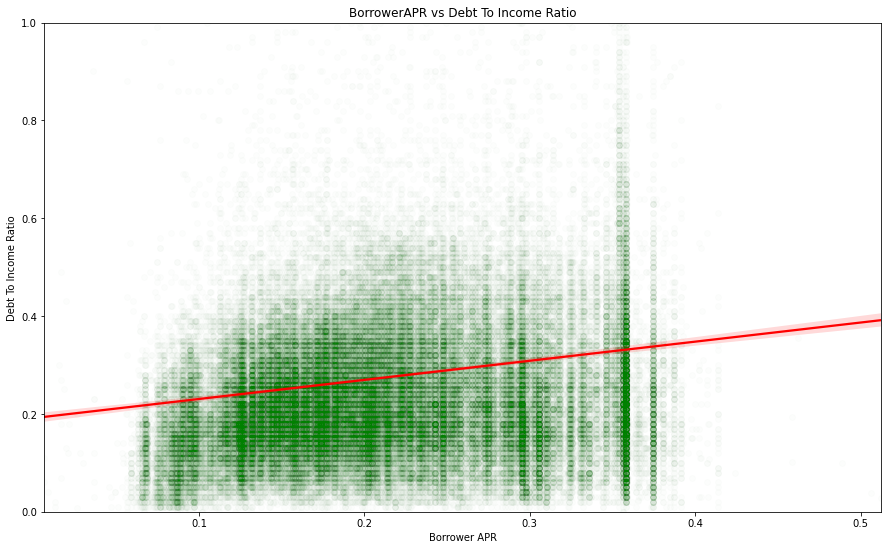

In [5]:
#BorrowerAPR vs DebtToIncomeRatio
plt.figure(figsize=(15,9))
sb.regplot(data = df, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', scatter_kws={'alpha':.01}, color = "green", line_kws={"color":"red"});
plt.xlabel('Borrower APR')
plt.ylabel('Debt To Income Ratio')
plt.ylim(0, 1);
plt.title('BorrowerAPR vs Debt To Income Ratio');

## The Impact of Prosper Rating on Borrower APR and Loan Original Amount

>Coming up is an interesting slide. As we can see that the better rating the lower APR and the worse rating means higher APR, Which is totally understandable as lower rating means higher risk. However the interesting part is related to Loan Original Amount. We can see that in case of a good rating (AA or A) that higher loan amount means higher APR. While on the lower ratings (From B to HR) the higher loan amount the lower APR. This may be due to if higher rating want higher amount they will not complain from the higher APR on the other hand maybe lower rating will not want to get high amount loans so lower APR is for encouraging them to take larger loans.



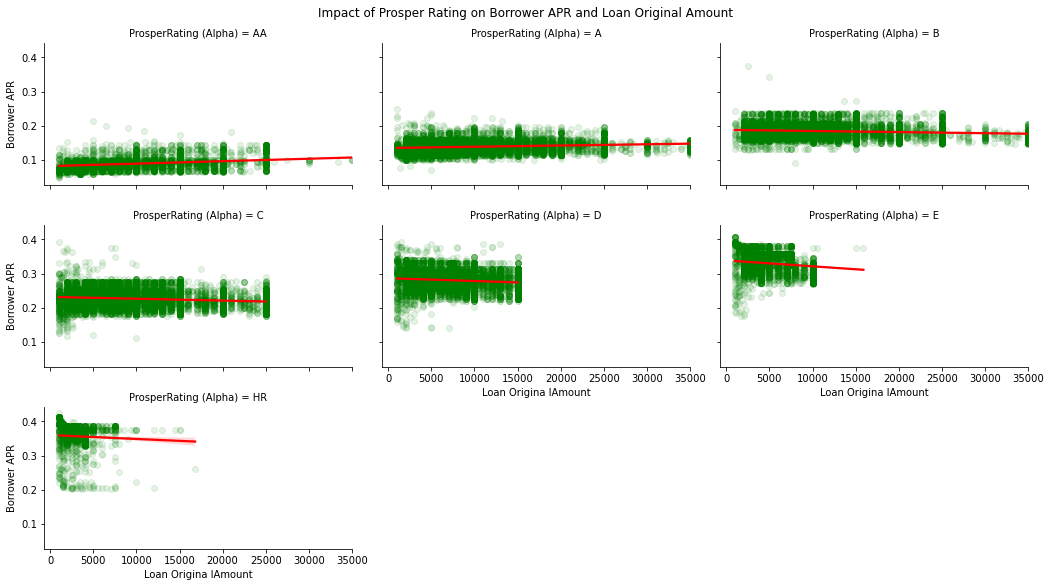

In [6]:
#The impact of ProsperRating on BorrowerAPR and LoanOriginalAmount

g=sb.FacetGrid(data=df, col='ProsperRating (Alpha)',margin_titles = False, col_wrap=3, height = 8.27/3 , aspect = (14.70/3)/(8.27/3));
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1}, color = "green", line_kws={"color":"red"},);
plt.suptitle('Impact of Prosper Rating on Borrower APR and Loan Original Amount');
plt.subplots_adjust(top=0.92);
g.set_xlabels('Loan Origina lAmount');
g.set_ylabels('Borrower APR');

## The Impact of Prosper Rating and Whether or not the Income is Verifiable on Borrower APR.

>Coming up is a clear relation between prosper rating and APR. The better the rating the lower the APR. Also we can see that if the income is verifiable it gets slightly lower APR as well. That said across all APRs with the exception of rating B.

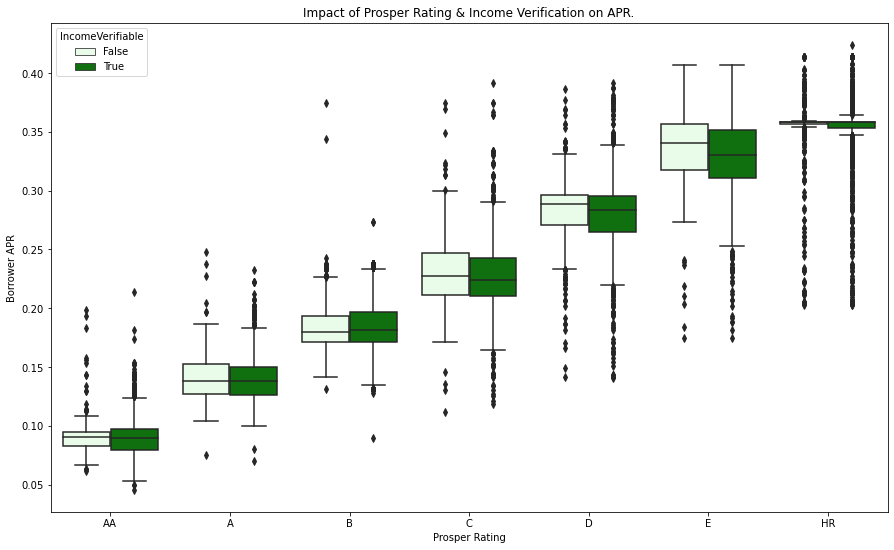

In [7]:
#Checking the relation between ProsperRating, BorrowerAPR and IncomeVerifiable
g = sb.boxplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='IncomeVerifiable', color = "green");
g.figure.set_figwidth(15)
g.figure.set_figheight(9)
plt.xlabel('Prosper Rating');
plt.ylabel('Borrower APR');
plt.title('Impact of Prosper Rating & Income Verification on APR.');

## The Impact of Employment Status and Whether or not the Borrower is Home Owner on Borrower APR.

>Here is some interesting points in the coming plot. To begin with in case the borrower is a home owner he will always get lower APR than the borrower who don’t own a home in case they share the same employment status. However there is one exception if this borrower is not employed they actually will get lower APR if they are not home owners which I think may needs digging deeper to know the reason behind this. Also the lowest APR was for the group of employment status ‘Not Available’ and home owner, this implies that maybe employment value (not available) is not always negative thing however unfortunately we can’t know for sure its meaning

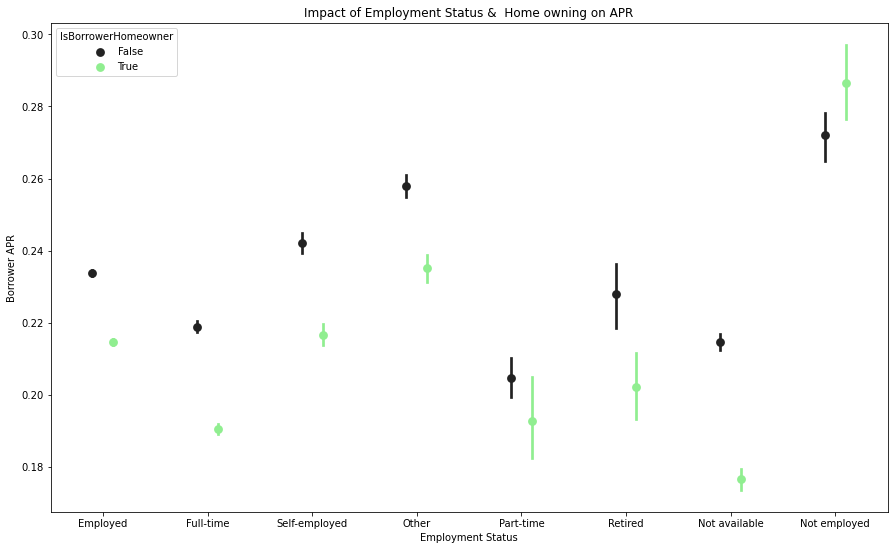

In [8]:
#Checking the relation between EmploymentStatus, BorrowerAPR and IsBorrowerHomeowner
g = sb.pointplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', linestyles = '', dodge = 0.2, color = "lightgreen")
g.figure.set_figwidth(15)
g.figure.set_figheight(9)
plt.xlabel('Employment Status');
plt.ylabel('Borrower APR');
plt.title('Impact of Employment Status &  Home owning on APR');

## The relation between Stated Monthly Income and whether or not it’s verifiable and the impact of the two variables on the Prosper Rating

>From the previous plots I think that one of the most important variables that affect the borrower APR is his rating. In the next plot I tried to have a closer look on what might be affecting that rating. I have checked the rating against the stated monthly income and whether or not its verifiable and there we are. A clear relation between the monthly stated income as the more money you make the better rating your will get. And if the income is verifiable you will even get a better rating than if not.

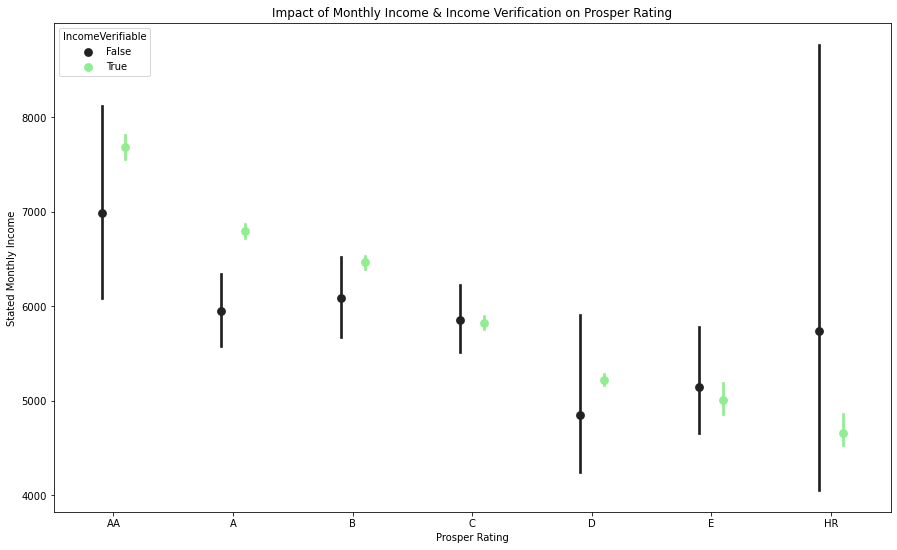

In [9]:
# Checking the relation between Stated Monthly Income and whether or not it’s verifiable and the impact of the two variables on the Prosper Rating

g = sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'IncomeVerifiable', linestyles = '', dodge = 0.2, color = "lightgreen");
g.figure.set_figwidth(15)
g.figure.set_figheight(9)


plt.xlabel('Prosper Rating');
plt.ylabel('Stated Monthly Income');
plt.title('Impact of Monthly Income & Income Verification on Prosper Rating');

In [10]:
!jupyter nbconvert Prospoer_Loans_Explanatory_slides.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Prospoer_Loans_Explanatory_slides.ipynb to slides
[NbConvertApp] Writing 1052157 bytes to Prospoer_Loans_Explanatory_slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_